# 机器学习：预测泰坦尼克号灾难的幸存者

From Kaggle: Machine Learning from Disaster

https://www.kaggle.com/c/titanic

# 项目背景

- 泰坦尼克号的沉没是历史上最臭名昭著的海难之一。


- 1912年4月15日，在她的处女航中，被普遍认为“沉没”的RMS泰坦尼克号与冰山相撞后沉没。不幸的是，船上没有足够的救生艇供所有人使用，导致2224名乘客和机组人员中的1502人死亡。


- 尽管幸存有一些运气，但似乎有些人比其他人更有可能生存。

# 项目目标

- 在本项目中，我们将使用乘客数据（即姓名，年龄，性别，社会经济舱等）建立多个预测模型来回答：**“什么样的人更有可能生存？”** 。


- 最终选出最优的算法模型，对泰坦尼克号沉船事故中哪些人会幸存下来进行预测。


- 初步决定采用**`Accuracy(准确率)、F1score`**作为模型表现的评估指标。


- F1score = 2×Precision×Recall / (Precision+Recall)

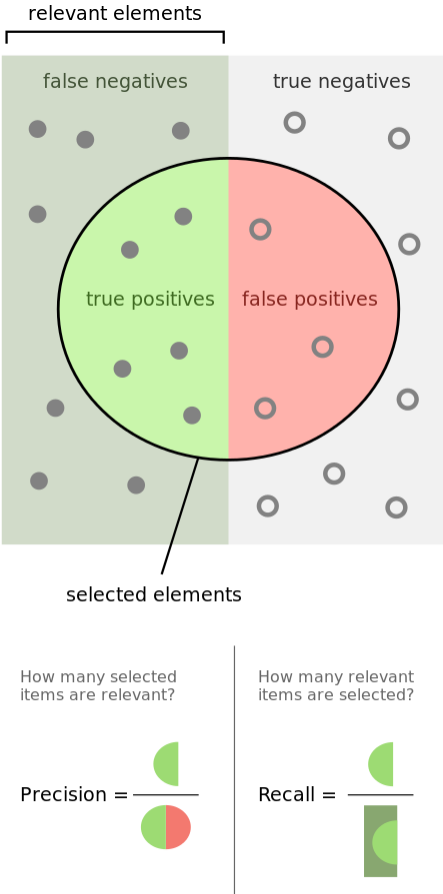

# 项目字典



- **Survived**：存活结果（0 = 存活；1 = 未存活）
- **Pclass**：社会阶层（1 = 上层；2 = 中层；3 = 底层）
- **Name**：乘客姓名
- **Sex**：乘客性别
- **Age**：乘客年龄（某些条目为 `NaN`）
- **SibSp**：一起上船的兄弟姐妹和配偶人数
- **Parch**：一起上船的父母和子女人数
- **Ticket**：乘客的票号
- **Fare**：乘客支付的票价
- **Cabin**：乘客的客舱号（某些条目为 `NaN`）
- **Embarked**：乘客的登船港（C = 瑟堡；Q = 皇后镇；S = 南安普顿）

`**Variable Notes**`

- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

# 数据预处理

## 数据加载

In [54]:
# 导入标准库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [55]:
df_train = pd.read_csv('titanic_data_train.csv')
df_test_features = pd.read_csv('titanic_data_test.csv')
df_test_label = pd.read_csv('gender_submission.csv')

## 数据评估

In [56]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [57]:
df_test_features.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [58]:
df_test_label.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [59]:
print('The train dataset:',df.shape)
print('The features of test dataset:',df_test_features.shape)
print('The label of test dataset:',df_test_label.shape)

The train dataset: (891, 11)
The features of test dataset: (418, 11)
The label of test dataset: (418, 2)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [61]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
df_test_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [63]:
# 查看各列数据概况
col_list = df.columns
for i in col_list:
    
    print('Column name:',i)
    print('-------------------------------')
    print(df[i].value_counts().nlargest(20))
    print('\n')

Column name: PassengerId
-------------------------------
891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
Name: PassengerId, dtype: int64


Column name: Pclass
-------------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64


Column name: Name
-------------------------------
Hickman, Mr. Stanley George                       1
Williams, Mr. Charles Duane                       1
Thayer, Mr. John Borland                          1
Patchett, Mr. George                              1
Rush, Mr. Alfred George John                      1
Vanden Steen, Mr. Leo Peter                       1
Andersson, Master. Sigvard Harald Elias           1
Buss, Miss. Kate                                  1
Kilgannon, Mr. Thomas J                           1
Smith, Miss. Marion Elsie                         1
Carter, Mr. William Ernest                        1

In [64]:
print(df.duplicated().sum())
print(df_test_features.duplicated().sum())
print(df_test_label.duplicated().sum())

0
0
0


- `**评估结果：**`
    - 数据集titanic_data_train.csv中含有Survived标签列，为后期训练的label，需要将其单独分离出来
    - 数据集titanic_data_test.csv中仅有对应乘客的features，对应Survived标签列在数据集gender_submission.csv中
    - 训练集共891行数据，测试集共418行数据，乘客拥用11个特征。
    - 数据集titanic_data_train.csv中的Age、Cabin、Embarked列分别存在177、687、2个NaN；数据集titanic_data_test.csv中的Age、Fare、Cabin分别存在86、1、327个NaN。
    - Ticket列数据存在多种形式
    - Cabin列数据存在一格写多个values的情况，可能是同行多人导致。
    - 数据集中各列value暂未发现格式不妥的情况。
    - 数据集中均不存在重复项

## 数据清理

In [65]:
# 数据备份
df = df_train.copy()
df1 = df_test_features.copy()

### 整洁度
经观察，并无整洁度问题，唯一需要进行的结构调整，是将Survived列从数据集中分离出来。

In [66]:
train_label = df['Survived']
train = df.drop(['Survived'],axis=1)

In [67]:
train.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
322,323,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.35,NaN,Q


### 质量维度

- 处理数据集中的NaN值，尝试进行填充：首先填充0查看训练结果，之后再尝试进行合理化填充，之后核实训练结果是否改善。
- 观察和清理Ticket、Cabin列中的values格式问题。